In [1]:
import pandas as pd
import joblib
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np

# Load our pre-split data from the file we saved earlier
data = joblib.load('../Results/split_data.joblib')
X_train = data['X_train']
y_train = data['y_train']

print("Training data loaded successfully.")


Training data loaded successfully.


In [2]:
# We want to select the top 20 features
k = 20

# Initialize the feature selector
# f_classif is a good choice for binary classification tasks
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to our training data
selector.fit(X_train, y_train)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(f"--- Top {k} Most Predictive Features ---")
print(feature_scores.head(k))

# Get the names of the top k features
top_k_features = selector.get_feature_names_out(X_train.columns)


--- Top 20 Most Predictive Features ---
                                              Feature      Score
57              original_gldm_DependenceNonUniformity  14.942231
79              original_glrlm_RunLengthNonUniformity  14.748632
12                  original_shape_SurfaceVolumeRatio  13.525339
13                         original_shape_VoxelVolume  12.321638
8                           original_shape_MeshVolume  12.321059
70              original_glrlm_GrayLevelNonUniformity  10.216591
94               original_glszm_SizeZoneNonUniformity   9.239907
59                   original_gldm_DependenceVariance   9.201736
47                      original_glcm_InverseVariance   9.010348
11                         original_shape_SurfaceArea   8.949754
86              original_glszm_GrayLevelNonUniformity   8.618443
6               original_shape_Maximum2DDiameterSlice   7.528873
63              original_gldm_LargeDependenceEmphasis   7.038588
82                         original_glrlm_RunVaria

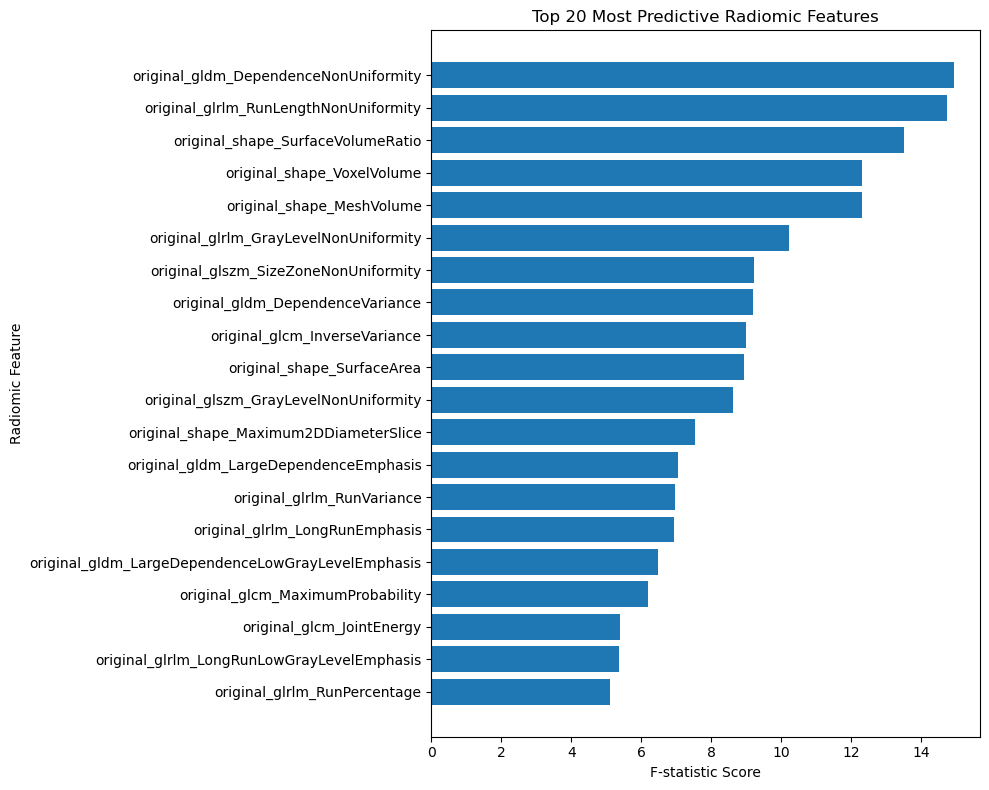

In [3]:
# Plot the scores of the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(feature_scores.head(k)['Feature'], feature_scores.head(k)['Score'])
plt.xlabel('F-statistic Score')
plt.ylabel('Radiomic Feature')
plt.title('Top 20 Most Predictive Radiomic Features')
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.tight_layout()
plt.show()
